In [30]:
import numpy
import pandas
import statsmodels.formula.api as smf 
import statsmodels.stats.multicomp as multi
import seaborn
import matplotlib.pyplot as plt


data = pandas.read_csv('diet_exercise.csv', low_memory=False)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Exercise      40 non-null object
Diet          40 non-null object
WeightLoss    40 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [20]:

model1 = smf.ols(formula='WeightLoss ~ C(Diet)', data=data).fit()
print (model1.summary())

sub1 = data[['WeightLoss', 'Diet']].dropna()


print ("=========평균==========")
print ("# 식단 A와 B 간의 체중 감소량 비교")
print ("means for WeightLoss by Diet A vs. B") 
m1= sub1.groupby('Diet').mean()  # 평균
print (m1)


print ("=========표준편차==========")
print ("# 식단 A와 B 간의 체중 감소량 비교")
print ("standard deviation for mean WeightLoss by Diet A vs. B") 
st1= sub1.groupby('Diet').std()  # 표준편차
print (st1)


                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sat, 08 Aug 2020   Prob (F-statistic):            0.00133
Time:                        00:18:24   Log-Likelihood:                -119.06
No. Observations:                  40   AIC:                             242.1
Df Residuals:                      38   BIC:                             245.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.6550      1.089     13.457   

### 해석

means for WeightLoss by Diet A vs. B -> WeightLoss
Diet            
A         14.655
B          9.320


이를 보면 식단 (A)가 체중을 더 많이 빼게 해줬다는 걸 알 수 있다


ols 결과표에서 나오는

"""Prob (F-statistic):            0.00133"""

는 식단 A 가 식단 B 보다 체중감소에 더 "연관되어 있다associated" 라는 가설에 대한 p-value이다.
p-value가 만약 0.05보다 컸다면 그 결론이 기각됐을 것이다

/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(9.924999999999997, 0.5, 'Mean Weight Loss in pounds')

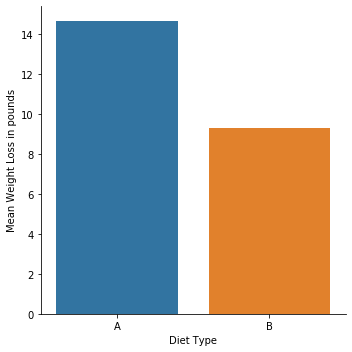

In [5]:

# bivariate bar graph
seaborn.factorplot(x="Diet", y="WeightLoss", data=data, kind="bar", ci=None)
plt.xlabel('Diet Type')
plt.ylabel('Mean Weight Loss in pounds')



# 여기까진 단순한 독립변수 둘(식단 A, B)에 종속변수 하나(체중감소).

# 이제 운동 타입 (유산소, 무산소) 이라는 조절변수를 추가해서 식단 -> 체중감소 간의 관계를 본다

In [8]:

# 이제 식단 타입 외에도 운동 타입을 구분해야한다
sub2=data[(data['Exercise']=='Cardio')]
sub3=data[(data['Exercise']=='Weights')]

print ('유산소 운동을 한 사람들 중 식단A, B가 체중감량에 미치는 영향 평가')

model2 = smf.ols(formula='WeightLoss ~ C(Diet)', data=sub2).fit()
print (model2.summary())


print("=====================")
print ('무산소 운동을 한 사람들 중 식단A, B가 체중감량에 미치는 영향 평가')
model3 = smf.ols(formula='WeightLoss ~ C(Diet)', data=sub3).fit()
print (model3.summary())


print("=====================")

print ("유산소 운동 한 사람들의 식단 A,B에 따른 체중감량 평균")
m3= sub2.groupby('Diet').mean()
print (m3)

print("=====================")


print ("무산소 운동 한 사람들의 식단 A,B에 따른 체중감량 평균")
m4 = sub3.groupby('Diet').mean()
print (m4)


유산소 운동을 한 사람들 중 식단A, B가 체중감량에 미치는 영향 평가
                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     280.7
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           2.00e-12
Time:                        17:26:41   Log-Likelihood:                -38.937
No. Observations:                  20   AIC:                             81.87
Df Residuals:                      18   BIC:                             83.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

## p값 해석

유산소 p값 거의 0에 가까운, 개낮게나옴.

이걸, 유산소 운동이 식단 A,B에 뭘 했다 라고 해석하는 게 *아니라*

유산소 그룹만 보고 식단A,B 간의 체중 감량 효과 차이에 대해서 통계적 유의미성을 따진 것임. 이해가 됨?

그러니 같은 절차로 무산소 그룹도 한번 더 해줘야하는 것임.

그렇게 두 번 발라 내어서 유산소 운동, 무산소 운동이라는 조절변수의 통계적유의미성을 찾아내야함


In [9]:
sub2

,Exercise,Diet,WeightLoss
0,Cardio,A,22.6
1,Cardio,A,18.9
2,Cardio,A,20.2
3,Cardio,A,18.5
4,Cardio,A,19.9
5,Cardio,A,17.4
6,Cardio,A,21.5
7,Cardio,A,23.6
8,Cardio,A,21.9
9,Cardio,A,20.5


## 해석

맨 위 결과에서는, A식단이 체중감량에 더 효과적이라고 나왔는데,

샘플의 운동 타입에 따라 B식단이 더 좋을 때도 있음을 확인 (무산소는 B 식단과 병행했을 때 살이 더 빠지네...)




In [4]:
print(format(2e-12, '.1000f'))

0.00000000000199999999999999995977329525851123073450568701225904533202992752194404602050781250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('https://raw.github.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')

In [4]:
df

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3,1,100,0,1,125024,1.0,13748.760,42.877480,0,...,0.000000,0.000000,1,0,0,65.20780,9.528776,1.386294,2.134299,1
1,3,1,100,0,2,125024,1.0,13748.760,43.877480,0,...,0.000000,0.000000,1,0,0,65.20780,9.528776,1.386294,4.128351,1
2,3,1,100,0,3,125024,1.0,13748.760,44.877480,0,...,0.000000,0.000000,1,0,0,65.20780,9.528776,1.386294,NaN,0
3,3,1,100,0,4,125024,1.0,13748.760,45.877480,0,...,0.000000,0.000000,1,0,0,65.20780,9.528776,1.386294,NaN,0
4,3,1,100,0,5,125024,1.0,13748.760,46.877480,0,...,0.000000,0.000000,1,0,0,65.20780,9.528776,1.386294,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,11,6,0,0,2,632073,0.0,6735.316,0.403149,1,...,0.000000,0.000000,0,0,0,70.68995,8.815269,1.945910,2.939512,1
20186,11,6,0,0,3,632073,0.0,6735.316,1.403149,1,...,0.000000,0.000000,0,0,0,70.68995,8.815269,2.079442,NaN,0
20187,18,6,25,0,3,632075,0.0,7493.087,0.305270,0,...,3.258096,8.006368,0,0,0,70.68995,8.921869,1.609438,6.368620,1
20188,18,6,25,0,3,632166,0.0,1896.569,0.056126,0,...,3.258096,6.542472,0,0,0,70.68995,7.548329,1.791759,4.201745,1


In [6]:
df["logincome"] = np.log1p(df.income)

In [7]:
df[['mdvis', 'logincome', 'hlthp']].tail()

,mdvis,logincome,hlthp
20185,2,8.815268,0
20186,0,8.815268,0
20187,8,8.921870,0
20188,8,7.548329,0
20189,6,8.815268,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mdvis   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     129.8
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           9.36e-57
Time:                        22:55:57   Log-Likelihood:                -58906.
No. Observations:               20190   AIC:                         1.178e+05
Df Residuals:                   20187   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2725      0.227      1.200      0.230      -0.173       0.718
logincome      0.2916      0.026     11.310      0.000       0.241       0.342
hlthp          3.2778      0.261     12.566      0.000       2.767       3.789
==============================================================================
Omnibus:                    20183.191   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1579001.221
Skew:                           4.835   Prob(JB):                         0.00
Kurtosis:                      45.231   Cond. No.                         74.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

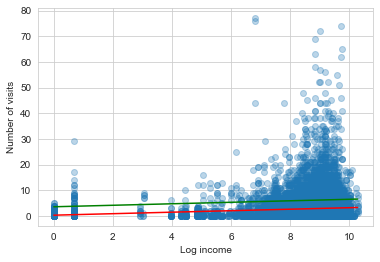

In [12]:

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')

import statsmodels.formula.api as smf

def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')


income_linspace = np.linspace(df.logincome.min(), df.logincome.max(), 100)

est = smf.ols(formula='mdvis ~ logincome + hlthp', data=df).fit() #명목범주 (0,1)인 hlthp는 +로 표기한다.

# 명목범주 인터렉션이 있는가 없는가를 표현 *1 Or *0
plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 0, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 1, 'g')  
est.summary()

Intercept          0.521726
hlthp             -0.499052
logincome          0.262981
hlthp:logincome    0.486814
dtype: float64


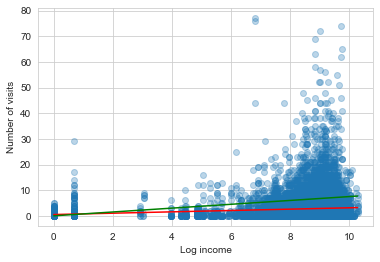

In [17]:
print(est.params)

plt.scatter(df.logincome, df.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')
est = smf.ols(formula='mdvis ~ hlthp * logincome', data=df).fit()  #logincom을 곱한다
plt.plot(income_linspace, est.params[0] + est.params[1] * 0 + est.params[2] * income_linspace +
est.params[3] * 0 * income_linspace, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * 1 + est.params[2] * income_linspace +
est.params[3] * 1 * income_linspace, 'g')

In [16]:
print(est.params)

Intercept          0.521726
hlthp             -0.499052
logincome          0.262981
hlthp:logincome    0.486814
dtype: float64


The * in the formula means that we want the interaction term in addition each term separately (called main-effects). If you want to include just an interaction, use : instead. This is generally avoided in analysis because it is almost always the case that, if a variable is important due to an interaction, it should have an effect by itself.

To summarize what is happening here:

If we include the category variables without interactions we have two lines, one for hlthp == 1 and one for hlthp == 0, with all having the same slope but different intercepts.
If we include the interactions, now each of the lines can have a different slope. This captures the effect that variation with income may be different for people who are in poor health than for people who are in better health.
For more information on the supported formulas see the documentation of patsy, used by statsmodels to parse the formula.

 

In [36]:
# est = smf.ols(formula='mdvis ~ hlthp * logincome', data=df).fit()
#mdvis ~ : 종속변수는 ~ 앞에 둔다

#hlthp * logincom <- hlthp(명목범주)와 logincom 사이의 조절변수를 찾아낸다는 뜻



#est = smf.ols(formula='mdvis ~ logincome + hlthp', data=df).fit() 
# 원래는 mdvis와 logincome 간의 단순ols회귀분석이지만 명목범주 인터렉션이 들어가면 + hlthp를 해준다. +를 쓰는것.

# 그런데 hlthp와 logincome이 상호작용을 한다면 상호작용항을 해줘여하기 때문에 *를 쓴다 위처럼

In [37]:

model1 = smf.ols(formula='WeightLoss ~ C(Diet)', data=data).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sat, 08 Aug 2020   Prob (F-statistic):            0.00133
Time:                        00:39:31   Log-Likelihood:                -119.06
No. Observations:                  40   AIC:                             242.1
Df Residuals:                      38   BIC:                             245.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.6550      1.089     13.457   

In [38]:
data.loc[data['Exercise'] == "Cardio", 'Exercise'] = 1

/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [39]:
data.loc[~(data['Exercise'] == 1), 'Exercise'] = 0

In [40]:
model1 = smf.ols(formula='WeightLoss ~ C(Diet) + Exercise', data=data).fit()
print (model1.summary())


#smf.ols(formula='mdvis ~ logincome + hlthp', data=df).fit() 

                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     10.02
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           0.000332
Time:                        00:39:33   Log-Likelihood:                -115.89
No. Observations:                  40   AIC:                             237.8
Df Residuals:                      37   BIC:                             242.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.8375      1.249     10.281   

In [35]:
model1 = smf.ols(formula='WeightLoss ~ C(Diet) * Exercise', data=data).fit()
print (model1.summary())


                            OLS Regression Results                            
Dep. Variable:             WeightLoss   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           6.11e-18
Time:                        00:28:37   Log-Likelihood:                -78.799
No. Observations:                  40   AIC:                             165.6
Df Residuals:                      36   BIC:                             172.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.81